In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок
students = pd.read_csv('stud_math.csv')
display(students)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [3]:
# столбец "studytime, granular" не несет в себе никаких полезных данных
# предлагаю его просто удалить
students.drop(['studytime, granular'], inplace=True, axis=1)

In [4]:
students.info()  # многие столбцы имеют пропущенные значения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   Pstatus     350 non-null    object 
 6   Medu        392 non-null    float64
 7   Fedu        371 non-null    float64
 8   Mjob        376 non-null    object 
 9   Fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

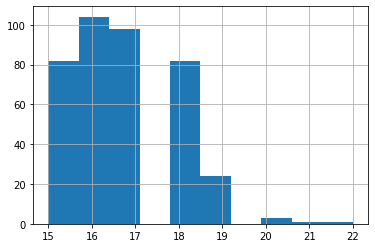

In [12]:
# постороим гистограммы для числовых переменных, чтобы визуализировать данные
students.age.hist()
students.age.describe()
# прорущенных значений в этом столбце нет, распределение возраста вполне адекватное, выбросов нет

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

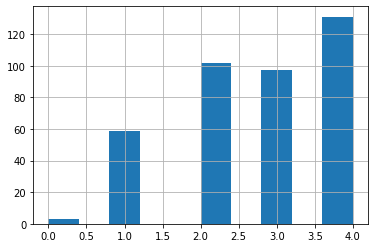

In [14]:
students.Medu.hist()
students.Medu.describe()
# есть 3 пропущенных значения, на что их заменить пока не понятно, выбросов так же нет

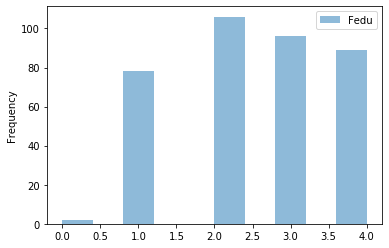

In [20]:
students['Fedu'].plot(kind='hist', legend=True, alpha=0.5)
students['Fedu'].describe()
# исходя из графика, видим очевидный выброс 40, предположим,
# что была ошибка при занесении данных и это должно было быть 4
students.loc[students.Fedu > 4, 'Fedu'] = 4

count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

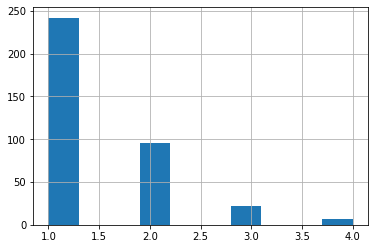

In [23]:
students.traveltime.hist()
students.traveltime.describe()
# так же достаточно много пропущенных значений (28), чем их заменить тоже не ясно
# выбросов не наблюдается

count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

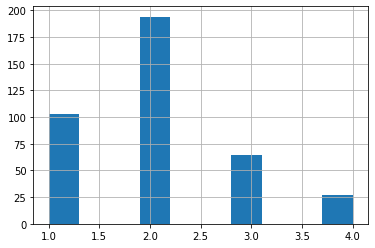

In [25]:
students.studytime.hist()
students.studytime.describe()
# мало пропущенных значений (7), выбросов нет

count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

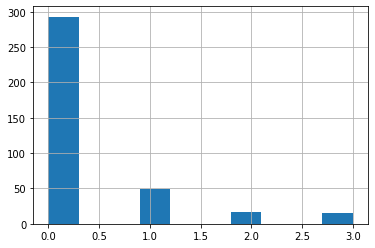

In [27]:
students.failures.hist()
students.failures.describe()
# пропущенных значений 22, выбросов нет

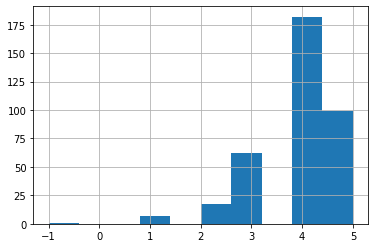

In [37]:
students.famrel.hist()
students.famrel.describe()
# пропущенных значений 27, есть еденичное значение "-1"
# предположим, что это тоже ошибка и заменим его на "1"
students.loc[students.famrel < 0, 'famrel'] = 1

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

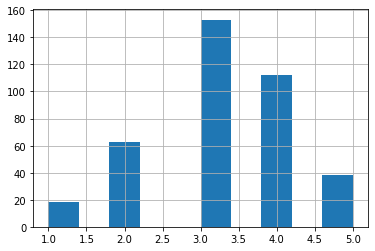

In [40]:
students.freetime.hist()
students.freetime.describe()
# пропущенных значений 11, выбросов нет

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

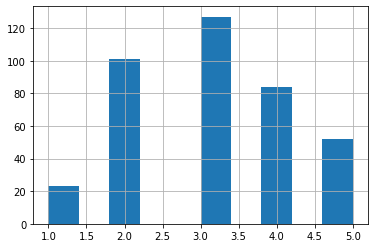

In [42]:
students.goout.hist()
students.goout.describe()
# пропущенных значений 8, выбросов нет

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

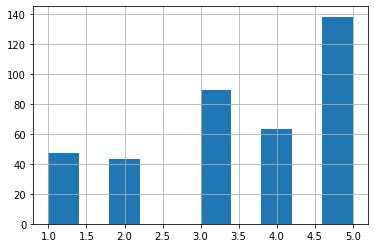

In [44]:
students.health.hist()
students.health.describe()
# пропущенных значений 15, выбросов нет

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

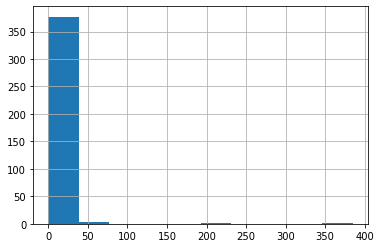

In [49]:
students.absences.hist()  # пропущенных значений 12
students.absences.describe()

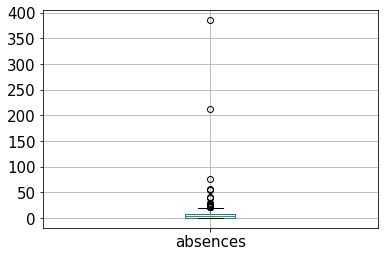

In [63]:
# для более наглядного понимания выбросов построим boxplot
students['absences'].plot(kind='box', legend=True, grid=True, fontsize=15)
# отфильтровать выбросы воспользовавшись формулой интерквартильного расстояния
# не получится, так как она удалит все значения больше 20, разумно предположить,
# что пропусков может быть и больше 20
# непонято на что заменить значения больше 200, по этому приравняем их к 0

count    383.000000
mean       5.720627
std        8.078008
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

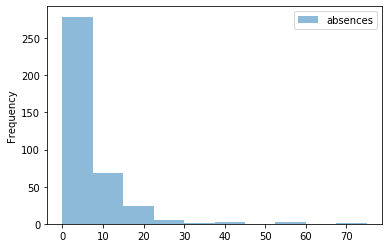

In [68]:
students.loc[students.absences > 200, 'absences'] = 0
students['absences'].plot(kind='hist', legend=True, alpha=0.5)
students['absences'].describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


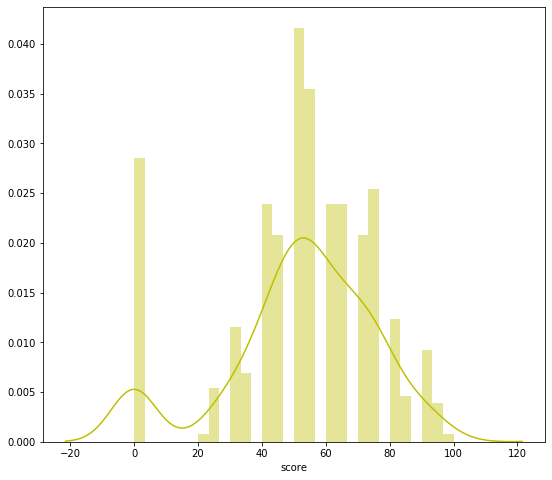

In [10]:
# рассмотрим как распределнна главная переменная
print(students['score'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(students['score'], color='y', bins=30)

In [12]:
# Основная часть оценок имеет нормальное распределение. 
# При этом имеется существенное число учеников получивших 0 баллов, 
# что выглядит весьма странно. Посмотрим какое количество таких учеников:

In [13]:
len(students[students['score'] == 0])

37

In [75]:
# выделим, наиболее сильно коррелирующие признаки
students_num_corr = students.corr()['score']
more_corr = students_num_corr[abs(
    students_num_corr) > 0.1].sort_values(ascending=False)
print("{} самых коррелиющих признаков:\n{}".format(len(more_corr), more_corr))

7 самых коррелиющих признаков:
score        1.000000
Medu         0.213349
Fedu         0.130923
studytime    0.115741
goout       -0.129685
age         -0.155726
failures    -0.344338
Name: score, dtype: float64


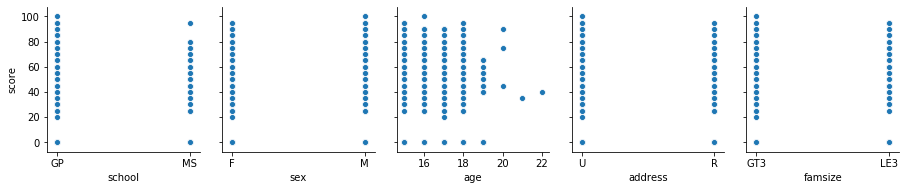

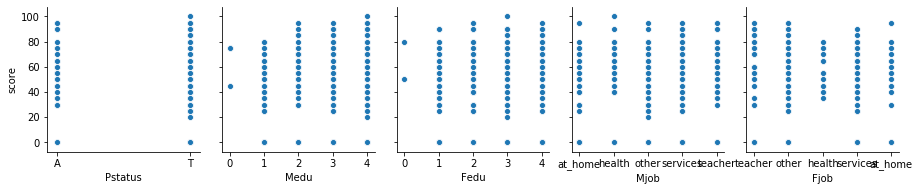

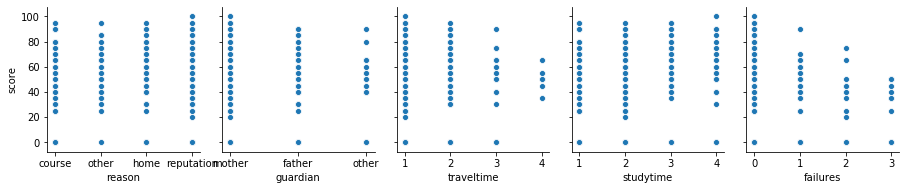

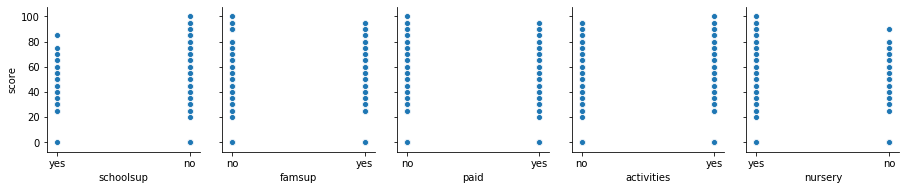

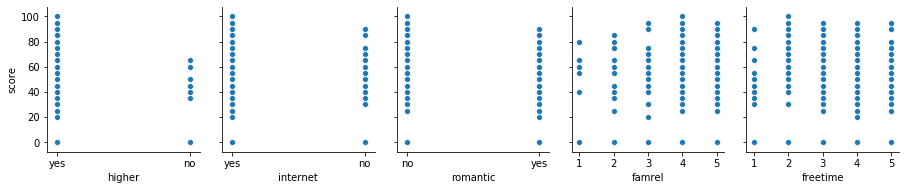

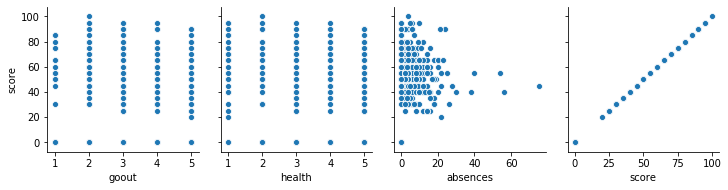

In [80]:
# построим графики для наглядности
for i in range(0, len(students.columns), 5):
    sns.pairplot(data=students,
                 x_vars=students.columns[i:i+5],
                 y_vars=['score'])

Исходя из полученных данных, сделаем вывод, что:
1. Чем лучше образование у родителей, тем выше итоговая оценка.
2. Чем больше времени ребенок уделяет учебе помимо школы, тем больше итоговый балл.
3. Так же довольно сиильно влияет число неудач в личной жизни, чем их меньше, тем вышел балл.
4. И на последок небольшое влияние имеет время провождение с друзьями и возраст (чем, меньше, тем выше балл).

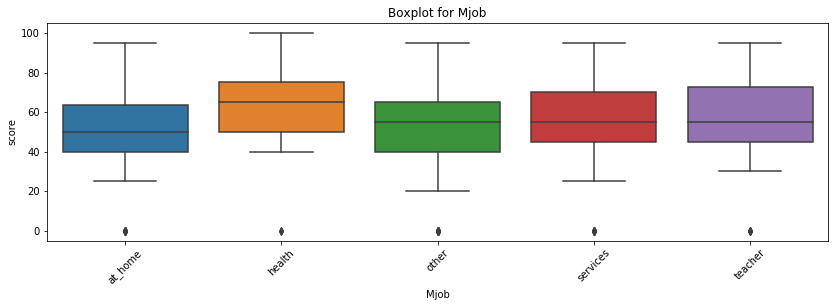

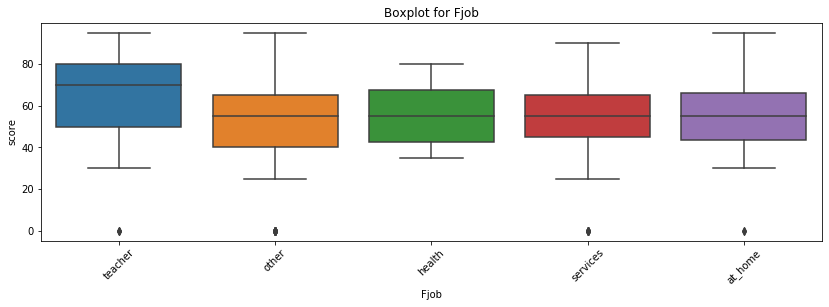

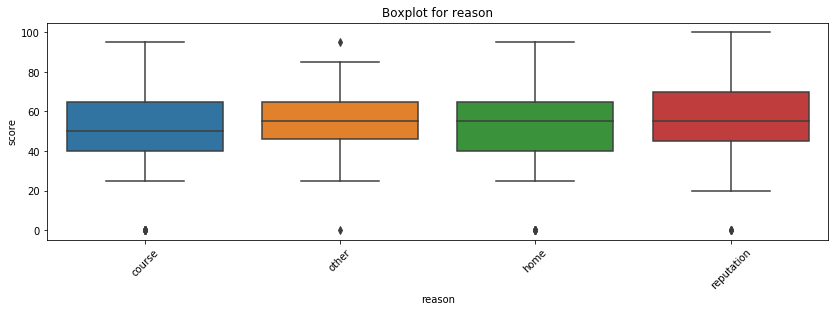

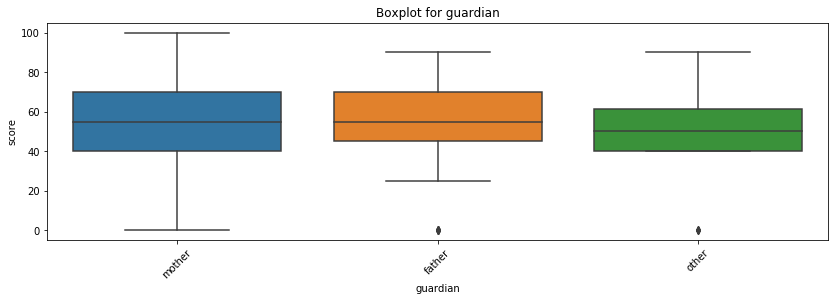

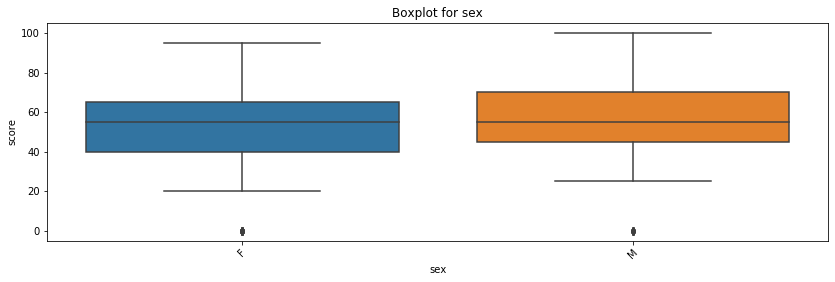

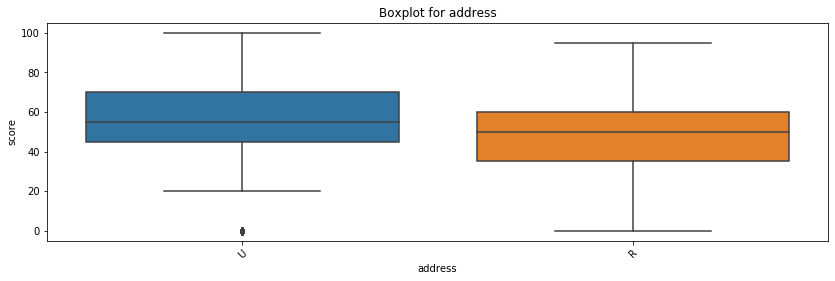

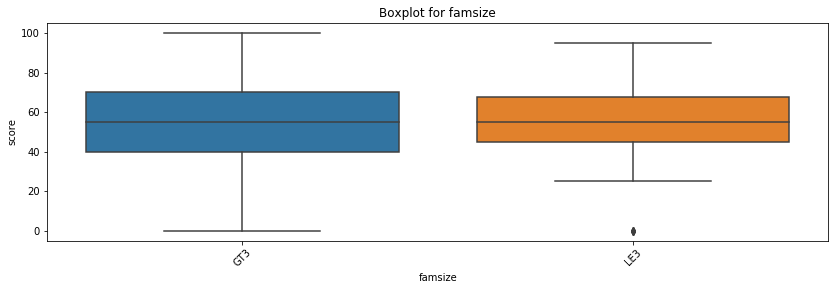

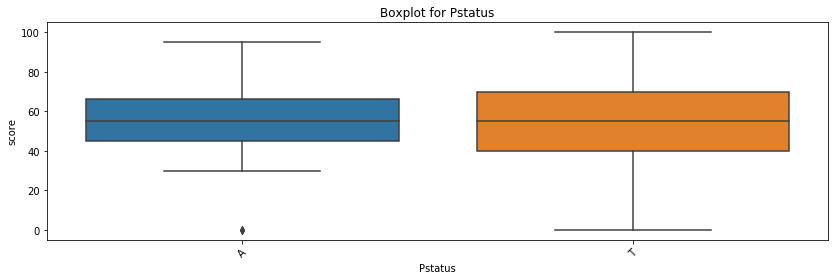

In [81]:
# на основании того, что в столбцах
# "['Mjob', 'Fjob', 'reason', 'guardian', 'sex', 'address', 'famsize', 'Pstatus']
# данные являются лишь маркерами, проведем их номинативный анализ


def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()


for col in ['Mjob', 'Fjob', 'reason', 'guardian', 'sex', 'address', 'famsize', 'Pstatus']:
    get_boxplot(col)

На основании номинативного анализа можно предположить, что:
- более высокий балл имеют дети, у которых мама работает в медецине, а папа - преподаватель
- что странно более выскоий балл имеют ученики, которые выбрали школу из-за репутации, а не из-за образовательной программы.
- Так же из анализа видно, что более высокий балл у тех у кого опекун отец.
- У девочек в среднем итоговая оценка выше, чем у мальчиков.
- Так же на балл влияет место жительства ребенка.